In [1]:
import sys
import numpy as np
from array import array
import matplotlib
import matplotlib.pyplot as plt
#from scipy import interpolate
from scipy.interpolate import interp1d
import matplotlib.colors as colors

%matplotlib inline

#matplotlib.rcParams['font.sans-serif'] = ['Arial']
#matplotlib.rcParams['font.sans-serif'] = ['Arial']
#matplotlib.rcParams['font.family'] = ['Times']
matplotlib.rcParams['font.family'] = ['Times New Roman']
matplotlib.rcParams['mathtext.fontset'] = 'stix'

#mpl.rcdefaults() #reset defaults

In [2]:
leak1 = np.loadtxt('leakage_1sig.txt',dtype=float,skiprows=1)
leak2 = np.loadtxt('leakage_2sig.txt',dtype=float,skiprows=1)
leak3 = np.loadtxt('leakage_3sig.txt',dtype=float,skiprows=1)
leakflat = np.loadtxt('leakage_flatNRmedian.txt',dtype=float,skiprows=1)
leakwimp = np.loadtxt('leakage_WIMP_median_1e8_fixed.txt',dtype=float,skiprows=1)
print( np.shape(leakwimp) )
masses = leakwimp[:,0]
print(leakwimp[-1,0])

(21, 2)
2000.0


In [3]:
#flat_leakage = np.mean( leakflat[:,1] ) #leakage of Ar37 accross flat NR median
a = np.array([0.00141283, 0.00141242, 0.00140479, 0.00141123])
flat_leakage = np.mean( a )
print(flat_leakage)

0.0014103174999999999


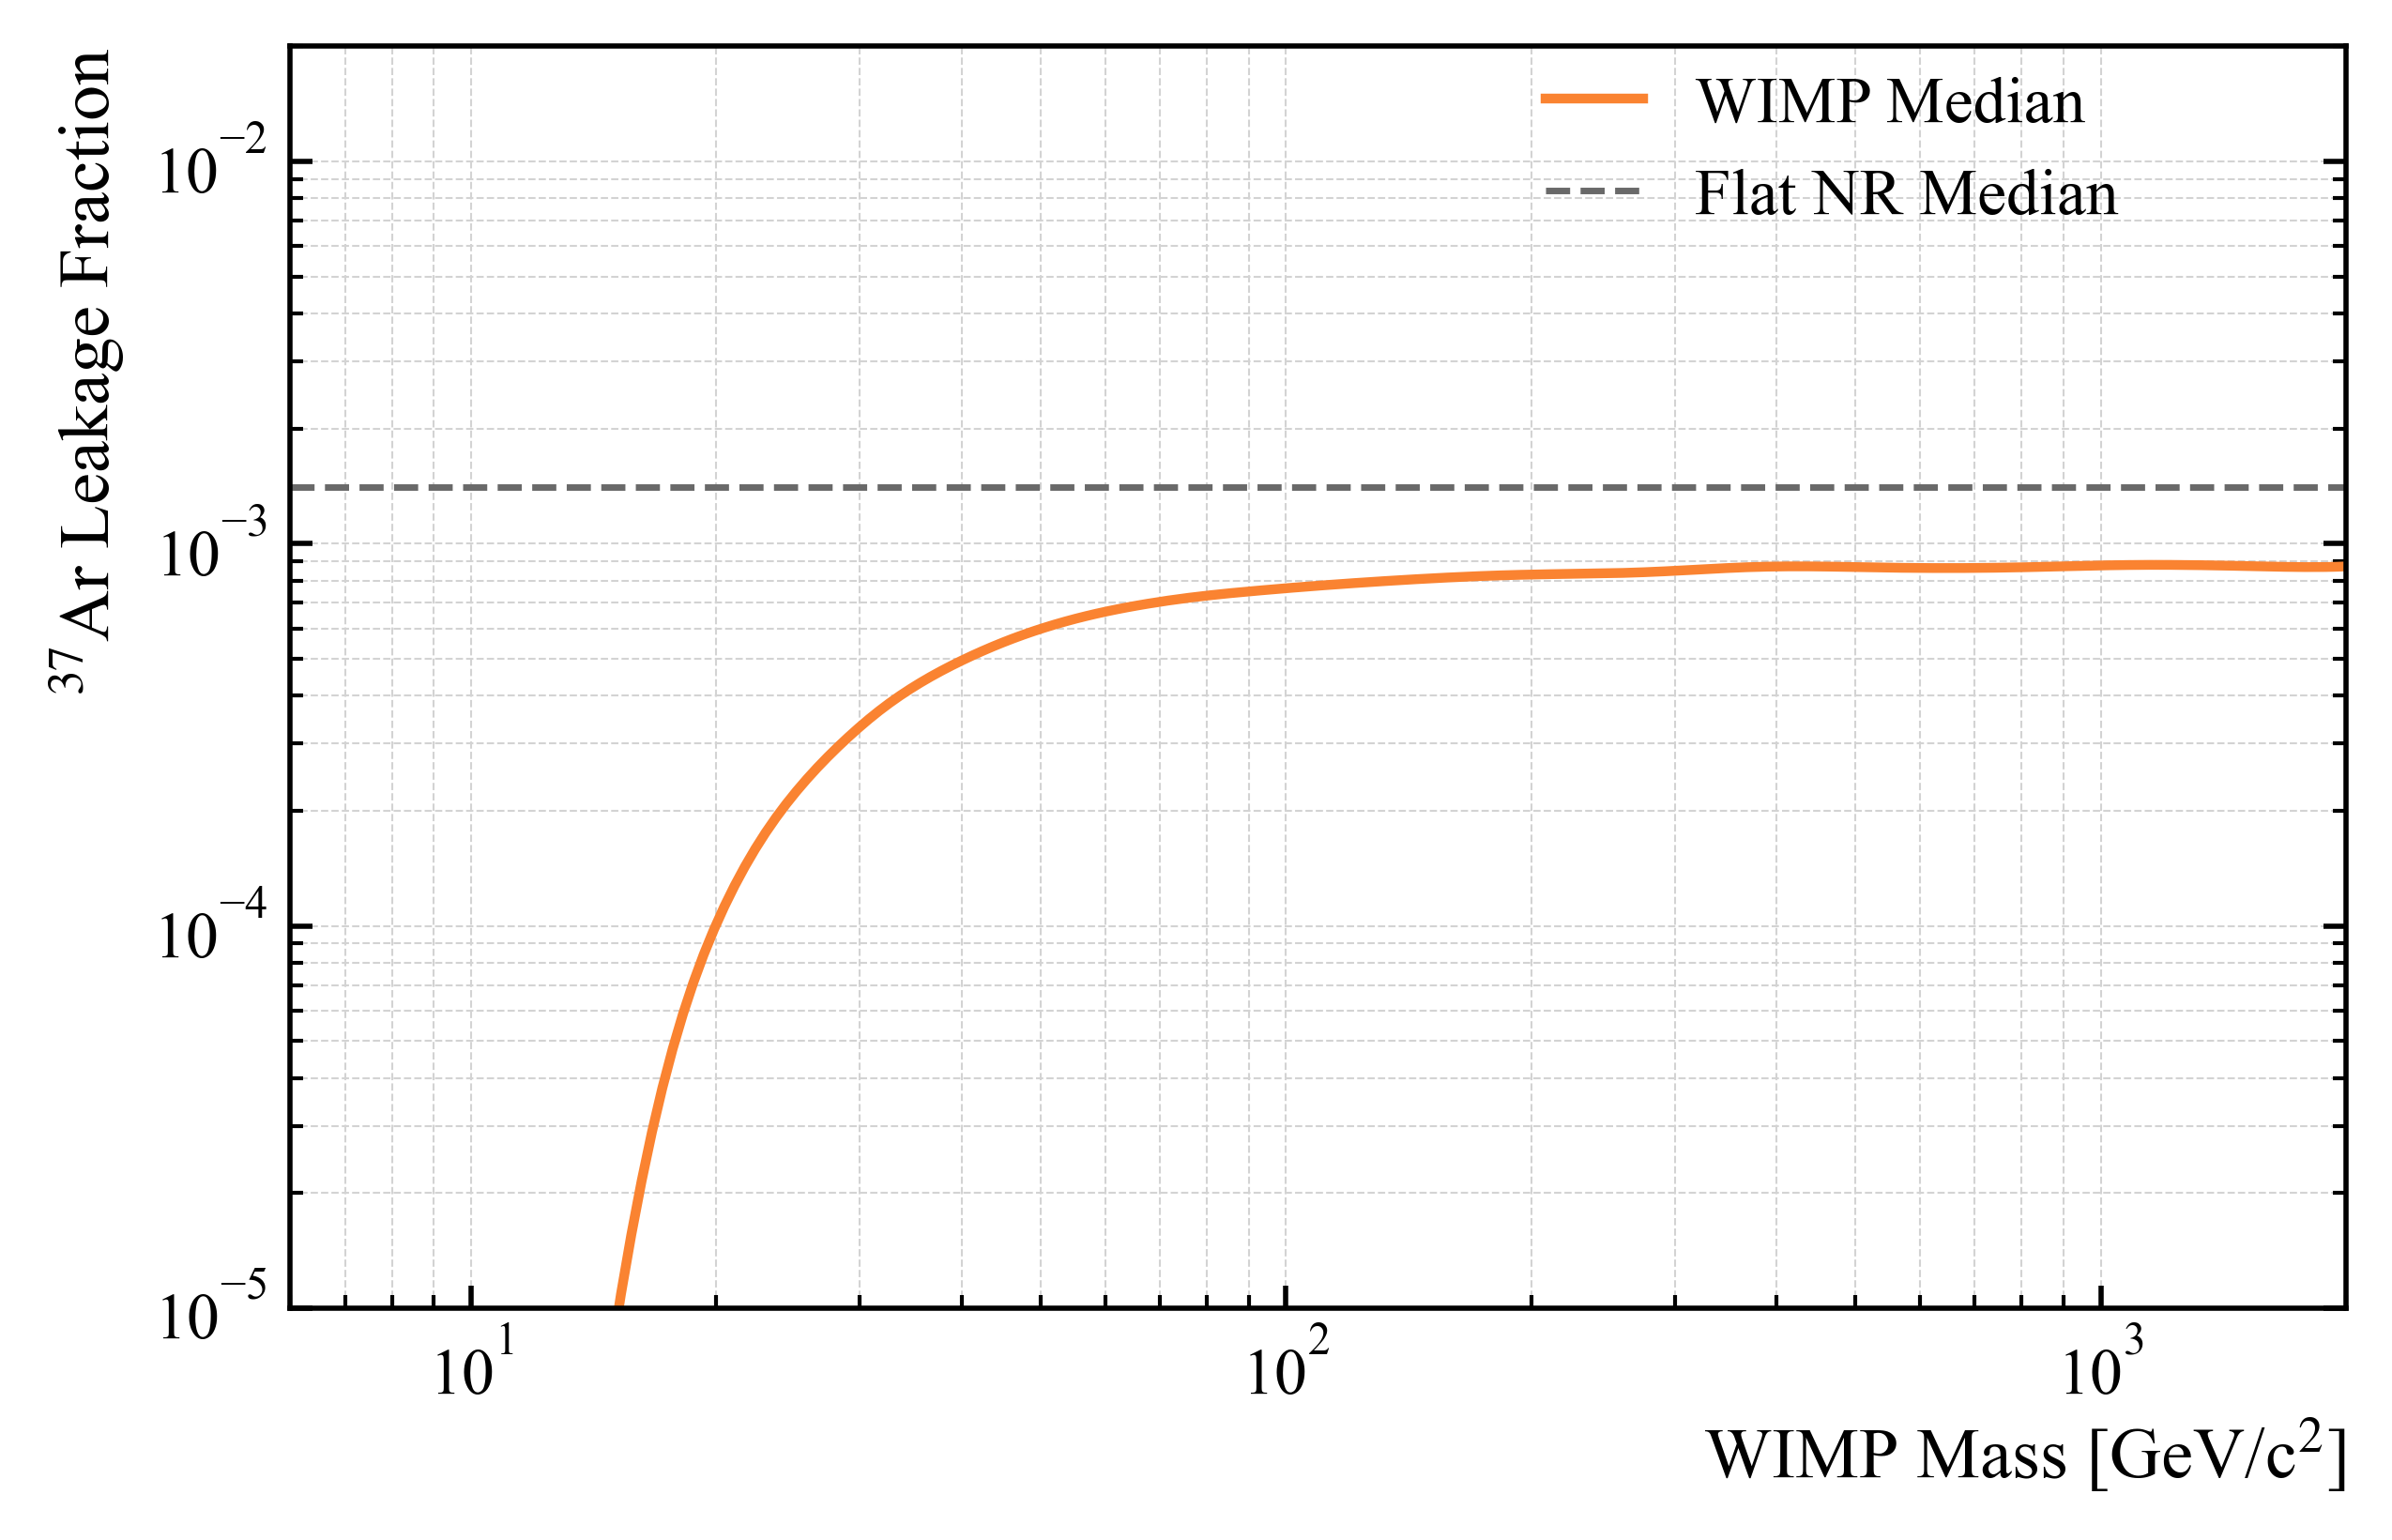

In [5]:
# make the plot
fig = plt.figure(figsize=(5.2,3.4),dpi=500)
ax = fig.gca()

lw = 1.5
n = 4
colors = plt.cm.Blues(np.linspace(0.35,0.9,n))
ocolors = plt.cm.Oranges(np.linspace(0.35,0.9,n))

#plt.plot(leakwimp[:,0],leakwimp[:,1],color=ocolors[0],linestyle='-',linewidth=lw,label=r'WIMP Median')

#spline to smooth:
f_cubic = interp1d(leakwimp[:,0], leakwimp[:,1], kind='cubic',fill_value='extrapolate')
newmasses = np.geomspace(leakwimp[0,0],leakwimp[-1,0],num=200,endpoint=True)
plt.plot(newmasses,f_cubic(newmasses),color=ocolors[1],linestyle='-',linewidth=lw,label=r'WIMP Median')

ax.axhline(flat_leakage, linestyle='--',linewidth=1,color='dimgrey',label=r'Flat NR Median') # flat NR leakage

#plt.plot(leak1[:,0],leak1[:,1],color=colors[1],linestyle='-',linewidth=lw,label=r'$1\sigma$ WIMP')
#plt.plot(leak2[:,0],leak2[:,1],color=colors[2],linestyle='-',linewidth=lw,label=r'$2\sigma$ WIMP')
#plt.plot(leak3[:,0],leak3[:,1],color=colors[3],linestyle='-',linewidth=lw,label=r'$3\sigma$ WIMP')

#----------------------------------------------------------------------------
ax.set_xlabel(r'WIMP Mass [GeV/c$^{2}$]',fontsize=11,labelpad=1.0,loc='right')
ax.set_ylabel(r'$^{37}$Ar Leakage Fraction',fontsize=11,loc='top')

xmin=6
xmax=2000
ymin=1e-5
ymax=2e-2
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')

ax.tick_params(direction='in',axis='both', which='both', labelsize=10)
ax.tick_params(which='both',right=True)

ax.grid(which='both',axis='both',linestyle='--',linewidth=0.3,color='lightgrey')

#ytickstep = 0.5
#xtickstep = 10
#ax.xaxis.set_ticks(np.arange(xmin, xmax+xtickstep, xtickstep))
#ax.yaxis.set_ticks(np.arange(ymin, ymax+ytickstep, ytickstep))

txtsize = 10
#ax.legend( loc='lower center',bbox_to_anchor=(0.75, 0.2),fontsize=txtsize,handlelength=1.5,framealpha=0,frameon=False )
leg = ax.legend( loc='lower center',bbox_to_anchor=(0.75, 0.81),fontsize=txtsize,handlelength=1.5,framealpha=0.5,frameon=False )
#leg = ax.legend( loc='lower center',bbox_to_anchor=(0.75, 0.45),fontsize=txtsize,handlelength=1.5,framealpha=0.5,frameon=False )

#plt.text(0.62, 0.94, r'$^{214}$Pb',fontsize=txtsize,weight='book',color=cmaps[0](0.7),horizontalalignment='left',verticalalignment='center', transform=ax.transAxes)
#plt.text(0.1, 0.08, r'$^{8}$B CE$\nu$NS',fontsize=txtsize,weight='book',color=cmaps[1](0.7),horizontalalignment='left',verticalalignment='center', transform=ax.transAxes)
#plt.text(0.03, 0.75, r'$^{37}$Ar',fontsize=txtsize,weight='book',color=cmaps[2](0.7),horizontalalignment='left',verticalalignment='center', transform=ax.transAxes)
#plt.text(0.2, 0.3, r'40 GeV/c$^{2}$ WIMP',fontsize=txtsize,weight='book',color=cmaps[3](0.7),horizontalalignment='left',verticalalignment='center', transform=ax.transAxes)

plt.tight_layout()
#plt.show()
#plt.savefig('/Users/scott/Downloads/Ar37_wimp_median_leakage.png')
#plt.savefig('/Users/scott/Downloads/Ar37_wimp_median_leakage.pdf')

In [62]:
print( plt.cm.Blues(0) )
print( plt.cm.Blues(255) )

(0.9686274509803922, 0.984313725490196, 1.0, 1.0)
(0.03137254901960784, 0.18823529411764706, 0.4196078431372549, 1.0)


In [73]:
v1 = plt.cm.Greens(0)
v2 = plt.cm.Greens(255)

print('Double_t Red[2] = [ {:0.15f}, {:0.15f} ]'.format(v1[0],v2[0]))
print('Double_t Green[2] = [ {:0.15f}, {:0.15f} ]'.format(v1[1],v2[1]))
print('Double_t Blue[2] = [ {:0.15f}, {:0.15f} ]'.format(v1[2],v2[2]))

Double_t Red[2] = [ 0.968627450980392, 0.000000000000000 ]
Double_t Green[2] = [ 0.988235294117647, 0.266666666666667 ]
Double_t Blue[2] = [ 0.960784313725490, 0.105882352941176 ]


In [12]:
masslist = np.geomspace(6,2000,30)
np.set_printoptions(precision=1)
print(masslist)
print(" ")
print(masslist.astype(int))

[   6.     7.3    9.    10.9   13.4   16.3   20.    24.4   29.8   36.4
   44.5   54.3   66.4   81.1   99.1  121.1  147.9  180.8  220.8  269.8
  329.7  402.8  492.1  601.2  734.6  897.5 1096.6 1339.8 1636.9 2000. ]
 
[   6    7    8   10   13   16   19   24   29   36   44   54   66   81
   99  121  147  180  220  269  329  402  492  601  734  897 1096 1339
 1636 2000]
